# Machine Learning
There are two main machine learning algorithms:
* Supervised learning: Teach the computer how to do something
* Unsupervised learning: We let the computer learn by itself

Reinforcement learning/recommender systems.

## Supervised Learning
The most common type of machine learning algorithm.
The term "supervised" means that we gave the algorithm the "right answers". For every example in the algorithm we gave it the "right answer".


### Regression
Predict continuous valued output (e.g. price of houses).

We use a training set. The number of training examples is denoted by $m$. The input variables are denoted using $x$ and the output variables are denoted with $y$.

$(x,y)$ denotes one training example

$(x^{(i)}, y^{(i)})$ denotes the i-th training example

The output of the learning algorithm is the learned function which is usually denoted by $h$ which stands for hypothesis. The function $h$, is a mapping $ x \to y$.

The representation of $h$ can vary. For linear regression we use $h_{\theta}(x) = \theta_0 + \theta_1 x$. The $\theta_i$ are the parameters of our model, and what we need to calculate.

#### Cost function
We choose the $\theta_0, \theta_1$ so that the value $h_\theta (x)$ is close to $y$ for our training examples. To do that we define the cost function as:

$$ J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i = 1}^m {(h_{\theta}(x^{(i)}) - y^{(i)})^2 } $$

This cost function is called the squared error function. And then we solve the following minimization problem:

$$ \underset{{\theta_0,\theta_1}}{\text{minimize}}\ J(\theta_0, \theta_1) $$




### Classification 
Try to separate the data in different classes.

Discrete valued output (0, 1). Sometimes you can have more than a binary output. The zero is called the "Negative class" which denotes the absence of something and 1 which is called the "Positive Class" the presence of something.

#### Binary classification problem
An initial approach is to take the output of the linear regression and use a threshold for it. If it's greater than 0.5 then predict 1 otherwise 0. However this approach leads to bad results, especially when we have outliers.

Additionally the linear regression algorithm outputs values that can be greater than 1 or less than zero.

#### Logistic regression
For linear regression the hypothesis was $ h_\theta (x) = \theta^T x $ 

For logistic regression we would like our classfier to output the following values.
$$ 0 \leq h_\theta (x) \leq 1 $$

We modify the linear regression hypothesis and write $ h_\theta (x) = g( \theta^T x) $ 

The function $g$ is the sigmoid function which is defined as follows:

$$ g(z) = \frac{1}{1 + e^{-z}} $$

When the hypothesis $h_\theta (x) $ outputs a number, we treat it as the estimated probability that $ y = 1 $ on input $x$. 

$$ h_\theta (x) = \text{P}(y=1 \mid x;\theta) $$

Probability that $y=1$ given that $x$ parametrized by $\theta$.

##### Decision boundary
* We predict $y=1$ whenever $\theta^T x \geq 0$
* We predict $y=0$ whenever $\theta^T x \lt 0$

##### Non-linear decision boundaries

#### Cost function for logistic regression

For logistic regression we have $m$ examples and the hypothesis is represented by $h_\theta (x) = \frac{1}{1 + \text{e}^{\theta^T x}}$.

We want to use a cost function, but if we define it in a similar way to the one we used in linear regression, the resulting cost function is non-convex as it has multiple minima. 

$$ J(\theta) = \frac{1}{m} \sum_{i = 1}^m {\text{cost} (h_\theta (x^{(i)}), y^{(i)}) } $$

We define the cost function as

$$ \text{cost}( h_\theta(x), y) = 
    \begin{cases}
    - \text{log}(h_\theta(x))\ &\text{if}\ y = 1 \\
    - \text{log}(1 - h_\theta(x))\ &\text{if}\ y = 0 
    \end{cases}
$$

Because $y = 0$ or $y=1$ we can simplify the cost function and remove the two separate cases.

$$ \text{cost}( h_\theta(x), y) = -y \text{log}(h_\theta(x)) - (1 - y) \text{log}(1 - h_\theta(x))    
$$

$$ \frac{\partial }{\partial \theta_j}\ J(\theta) = \frac{1}{m} \sum_{i = 1}^m {(h_{\theta}(x^{(i)}) - y^{(i)}) x_j^{(i)} }   $$

#### Multiclass classification (One vs all classification)
In logistic regression we have two classes 0, and 1, but for various problems we may have multiple classes.

Take the multiclass problem and split it into several binary classification problems. For each binary problem estimate the parameters $\theta$ and determine the hypothesis $h^{(i)}_\theta (x)$ where $i$ is the index of the particular class that we are interested in. For example if we have 3 classes, then $i$ would range between 1 and 3. 

Once we have produced multiple hypotheses, on a new input we make a prediction by picking the class $i$ that maximizes:


$$ \underset{{i}}{\text{max}}\ h_\theta^{(i)} (x) $$
 



### Overfitting
It is the situation where we have too many features and the learned hypothesis may fit the training set very well but fail to generalize to new examples.

#### Addressing overfitting
* Plotting the hypothesis. But sometimes having too many features might make it difficult to visualize.
* **Reduce the number of features**. This can be done manually or we can have a model selection algorithm. However throwing away some of the features means that we are losing some information about the problem.
* **Regularization**. In this case we keep all the features but we reduce the magnitude/values of parameters $\theta_j$. This works well when we have a lot of features, each of which contributes a bit to predicting the value of $y$.

#### Regularization
The intuition behind regularization is that when we have higher order polynomials we penalize the higher-order $\theta$ parameters when we try to minimize the square difference of the error by adding extra terms in the minimization problem.

The idea is that small values for parameters $\theta_0, \dots, \theta_n$ leads to "simper" hypothesis which is less prone to overfit.


$$ J(\theta) = \frac{1}{2m} \bigg[  \sum_{i = 1}^m {(h_{\theta}(x^{(i)}) - y^{(i)})^2 + \lambda \sum_{j = 1}^n  \theta_j^2 \bigg] } $$

$$ \underset{{\theta}}{\text{minimize}}\ J(\theta) $$

We implement regularization by adding an extra regularization term in our cost function which penalizes every theta equally. The $\lambda$ is called the regularization parameter.

If the regularization parameter is extremely large, then all the $\theta$s become close to 0, and the only term that survives is $\theta_0$ which is akin to drawing a straight line and thus underfitting the data.


### Advanced optimization
In the discussion around gradient descent we established that given the $ J(\theta) $ and $ \frac{\partial }{\partial \theta_j}\ J(\theta) $, the algorithm found the optimum.

However there are several other optimization algorithms:
* Gradient descent
* Conjugate gradient
* BFGS
* L-BFGS

Some of the advantages include that:
* There's no need to manually pick the learning parameter $\alpha$
* They are often faster than gradient descent
* However they are more complex

### Neural Networks (Non-linear hypothesis)
When you start working on large problems with multiple features, as you start including quadratic or higher-order terms, you end up having a large number of terms in your hypothesis. For example, imagine a problem with 100 features. If you wanted to include second order terms, your hypothesis would have to include terms like $x_1^2, x_1 x_2, x_1 x_3, \dots$. In general the number of terms grows in the order of $\text{O}(n^2)$.


Each neuron is a "computational unit" that takes several inputs and outputs a value computed by the sigmoid function.

A neural network is a combination of neurons that are structured in layers, where the inputs of each layer come from the preceding layer and the outputs feed the next layer.

The first layer is called the input layer and the last layer is called the output layer.

The middle layer is called the "hidden layer".





## Unsupervised learning
Given a dataset we are asked to find some structure in the data

### Clustering

### Decompose the voices from a audio clip
Cocktail party problem.




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline  

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [3]:
np.identity(5)

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

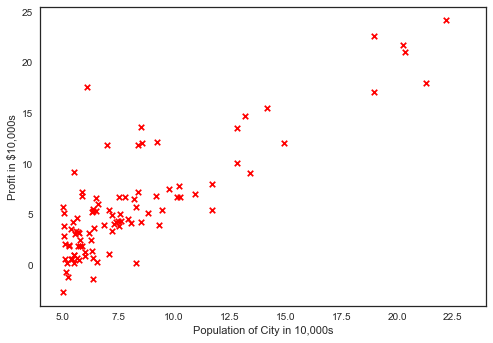

In [30]:
filename = "data/ex1data1.txt"
data = np.loadtxt(filename, delimiter=",")
type(data)
#help(pd.read_csv)
d = pd.read_csv(filename, header=None) # Header=None indicates no header
d.columns = ["population", "profits"]
d

plt.xlim(4,24)
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.scatter(d["population"], d["profits"], s=30, c="r", marker="x", linewidths=1)

#def costFunction(x, y, theta=)

#### Gradient descent algorithm
A generalised algorithm for solving minimization problems.

At every iteration we perform the following assignment until we converge.

$$ \theta_i := \theta_i - \alpha \frac{\partial }{\partial t}\ J(\theta_0, \dots, \theta_n) $$

In words, we compute the partial derivative of the cost function with respect to the variable we are trying to update, compute the cost function and then update the parameter $\theta$. The parameter $\alpha$ that appears in the equation is called the learning rate and indicates "how big" are the steps we take at every iteration. Note that as we approach a local miminum, the partial derivative term becomes smaller and small because the slope of the curve is smaller, and thus each successive step is smaller even with a fixed $\alpha$ term.

If $\alpha$ is too small the gradient descent can be slow. If $\alpha$ is too large, gradient descent can overshoot the minimum, may fail to converge, or even diverge.

**Batch gradient descent**
This term refers to the fact that at each step of the gradient descent algorithm, we use the entire set of data available to us to compute the derivative of the cost function.

#### Extensions
We can solve exactly for the parameters above, which would elimitate the need for the parameter $\alpha$


### Regression with multiple features

We extend the notation. We use a training set. The number of training examples is denoted by $m$. The input variables are denoted using $x$ and the output variables are denoted with $y$. We denot the number of features by $n$.

$(x,y)$ denotes one training example

$(x^{(i)}, y^{(i)})$ denotes all features of the i-th training example (vector)

$(x_j^{(i)}, y_j^{(i)})$ denotes value of feature $j$ of the i-th training example (single value)

The entire training set consists of $m$ training examples and $n$ features.

To generalize, the hypothesis now becomes:

$$ h_{\theta}(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n$$

Or in matrix notation:

$$ h_{\theta}(x) = \theta^T x$$

$$ \begin{align}
    x &= \begin{bmatrix}
           x_{0} \\
           x_{1} \\
           \vdots \\
           x_{n}
         \end{bmatrix}
  \end{align} \in \mathbb{R}^{n+1} $$
$$ \begin{align}
    \theta &= \begin{bmatrix}
           \theta_{0} \\
           \theta_{1} \\
           \vdots \\
           \theta_{n}
         \end{bmatrix}
  \end{align} \in \mathbb{R}^{n+1} $$

#### Feature scaling
This is a techinique to make gradient descent converges faster. The idea is to **make sure features are on a similar scale**.

For example, square footage of a house (0-5000), and number of bedrooms (1-5). 

More generally what we want is to get every feature into approximately $ -1 \leq x_i \leq 1$.

Practically we can turn these feature values into z-scores or subtract the mean and divide by the range.

$$ z = \frac{x - \mu}{\sigma^2} $$

$$ x' = \frac{x - \mu}{\text{max}(x) - \text{min}(x)} $$


#### Choosing the learning rate

* If $\alpha$ is too small we may get slow convergence.
* If $\alpha$ is too large, the cost function may not decrese on every iternation, and thus may not converge.

Try $\dots 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1 \dots$


#### Polynomial regression
The same variable is raised to higher powers. To solve such problems, we performa a substitution where we create a new variable e.g. $x_2 = x_1^2$ and then solve the normal multi-variate linear regression.

### Normal equation for linear regression
Instead of solving the linear regression problem iteratively using gradient descent, we can use the normal equation.

$$ \begin{align}
    x &= \begin{bmatrix}
           x_{0} \\
           x_{1} \\
           \vdots \\
           x_{n}
         \end{bmatrix}
  \end{align} \in \mathbb{R}^{n+1} $$
$$ \begin{align}
    \theta &= \begin{bmatrix}
           \theta_{0} \\
           \theta_{1} \\
           \vdots \\
           \theta_{n}
         \end{bmatrix}
  \end{align} \in \mathbb{R}^{n+1} $$

$$ \theta = (X^T X)^{-1} X^T y $$

#### Advantages and disadvantages of gradient descent vs. normal equation

**Gradient Descent**
* Need to choose learning rate $\alpha$
* Needs many iterations
* Works well even with a large number of features (large $n$)

** Normal equation**
* No need to choose a learning rate $\alpha$
* Don't need to iterate
* Need to compute the inverse $(X^T X)^{-1}$ which can be slow for very large $n$. The cost of computing the inverse is in $\text{O}(n^3)$


#### When is $X^T X$ non-invertible (or degenerate)

* Redundant features
This occurs when you have redundant features, i.e. features that are linearly dependent (e.g. length in feet and length in meters)

* Too many features ($m \leq n$). More features $n$ than samples $m$. Delete some features or use regularization